In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/02_data.csv")

data = df.copy()

In [2]:
# Normalizando

#Separando as variáveis preditoras da variável-alvo
features = data.drop("rent", axis=1) 

# Normalizando os dados: subtrai a média e divide pelo desvio padrão
# Isso evita que uma variável com maior amplitude de valores influencie mais o resultado
features = (features - features.mean()) / features.std()

# Adicionando a variável-alvo de volta ao DataFrame
data_normalized = pd.concat([features, data["rent"]], axis=1)

In [3]:

# Separação em treino e teste


#80% dos dados para treino e 20% para teste
# A função sample() retorna uma amostra aleatória de um DataFrame
train = data_normalized.sample(frac=0.8, random_state=1)
test = data_normalized.drop(train.index)

# x são as variáveis preditoras e y é a variável-alvo
X_train = train.drop("rent", axis=1).values
y_train = train["rent"].values.reshape(-1, 1)

X_test = test.drop("rent", axis=1).values
y_test = test["rent"].values.reshape(-1, 1)


In [4]:

# Adicionando coluna de 1s para o intercepto
# A coluna de 1s é necessária para calcular o intercepto da reta de regressão no eixo y
# Isso é necessário porque a equação da reta de regressão é y = mx + b, onde b é o intercepto
# Para calcular o intercepto, precisamos adicionar uma coluna de 1s à matriz de variáveis preditoras
# Isso é feito adicionando uma coluna de 1s à matriz de variáveis preditoras

#hstack() é usado para concatenar arrays ao longo do eixo horizontal
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


In [5]:
# Calculando os coeficientes beta

# A equação para calcular os coeficientes beta é beta = (X^T * X)^-1 * X^T * y
# Onde X é a matriz de variáveis preditoras, y é a variável-alvo e T é a transposição da matriz

XtX = X_train_bias.T @ X_train_bias
XtX_inv = np.linalg.inv(XtX)
XtY = X_train_bias.T @ y_train
beta = XtX_inv @ XtY

In [6]:
# Previsão no treino e teste
y_train_pred = X_train_bias @ beta
y_test_pred = X_test_bias @ beta

In [7]:
# Avaliação

# A função mean_squared_error() calcula o erro quadrático médio entre os valores reais e previstos
# O erro quadrático médio é uma medida de quão bem o modelo se ajusta aos dados
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)


# O R² é uma medida de quão bem o modelo se ajusta aos dados
# A soma total dos quadrados é a soma dos quadrados das diferenças entre os valores reais e a média dos valores reais
# O R² varia de 0 a 1, onde 0 significa que o modelo não se ajusta aos dados e 1 significa que o modelo se ajusta perfeitamente aos dados
def r2_score(y, y_hat):
    ss_res = np.sum((y - y_hat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - ss_res/ss_tot

mse_train = mse(y_train, y_train_pred)
mse_test = mse(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE Treino:", mse_train)
print("MSE Teste:", mse_test)
print("R² Treino:", r2_train)
print("R² Teste:", r2_test)




MSE Treino: 2929517.844171501
MSE Teste: 3277641.6128876586
R² Treino: 0.5801684500150368
R² Teste: 0.5496229641182095


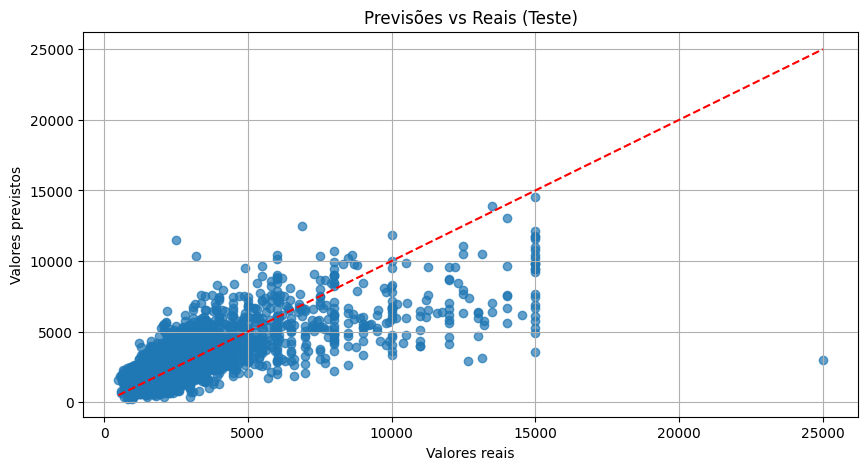

In [ ]:
# Visualização
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.7) # Pontos de dispersão 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Linha ideal
plt.xlabel("Valores reais")
plt.ylabel("Valores previstos")
plt.title("Previsões vs Reais (Teste)")
plt.grid(True)
plt.show()

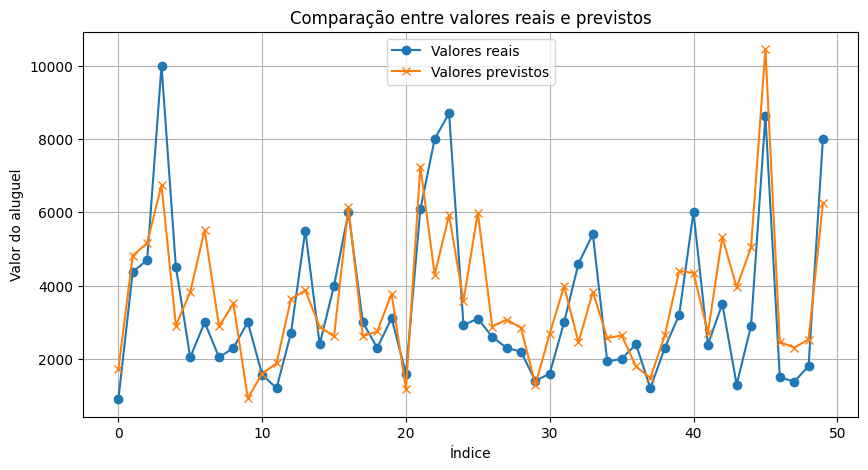

In [22]:
indices = np.random.choice(len(X_test), size=50, replace=False)

valores_reais = y_test[indices].flatten()
valores_previstos = y_test_pred[indices].flatten()

x = np.arange(len(valores_reais))

plt.figure(figsize=(10, 5))

plt.plot(x, valores_reais, label="Valores reais", marker='o')
plt.plot(x, valores_previstos, label="Valores previstos", marker='x')
plt.xlabel("Índice")
plt.ylabel("Valor do aluguel")
plt.title("Comparação entre valores reais e previstos")
plt.legend()
plt.grid(True)
plt.show()
